# Introduction to regression with neural network using tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data view and fit

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

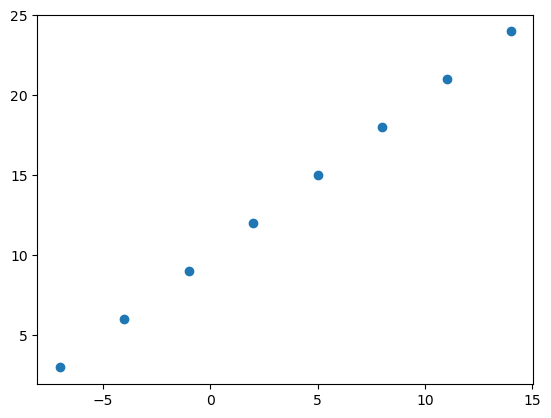

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [4]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
house_info.shape

TensorShape([3])

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 20.7905 - mae: 20.7905
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 20.4322 - mae: 20.4322
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 20.1509 - mae: 20.1509
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 19.8697 - mae: 19.8697
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 19.5884 - mae: 19.5884


In [7]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [8]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 1s 567ms/step


array([[-21.282747]], dtype=float32)

### Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7.8421 - mae: 7.8421
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 7.7096 - mae: 7.7096
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 7.5771 - mae: 7.5771
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4437 - mae: 7.4437
Epoch 11/100
1/1 [==============================] - 0s 69ms/step - loss

1/1 [==============================] - 0s 18ms/step - loss: 7.0050 - mae: 7.0050
Epoch 89/100
1/1 [==============================] - 0s 30ms/step - loss: 6.9994 - mae: 6.9994
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9938 - mae: 6.9938
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9881 - mae: 6.9881
Epoch 92/100
1/1 [==============================] - 0s 24ms/step - loss: 6.9825 - mae: 6.9825
Epoch 93/100
1/1 [==============================] - 0s 15ms/step - loss: 6.9769 - mae: 6.9769
Epoch 94/100
1/1 [==============================] - 0s 25ms/step - loss: 6.9713 - mae: 6.9713
Epoch 95/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9656 - mae: 6.9656
Epoch 96/100
1/1 [==============================] - 0s 21ms/step - loss: 6.9600 - mae: 6.9600
Epoch 97/100
1/1 [==============================] - 0s 25ms/step - loss: 6.9544 - mae: 6.9544
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [10]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [11]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 403ms/step


array([[30.023958]], dtype=float32)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5199 - mae: 13.5199
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 13.4688 - mae: 13.4688
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4176 - mae: 13.4176
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 13.3664 - mae: 13.3664
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3152 - mae: 13.3152
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 13.2639 - mae: 13.2639
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 13.2127 - mae: 13.2127
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 13.1614 - mae: 13.1614
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1101 - mae: 13.1101
Epoch 10/100
1/1 [==============================] - 0s 99ms/step - loss: 13.0587 - mae: 13.0587
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 20ms/step - loss: 8.6702 - mae: 8.6702
Epoch 87/100
1/1 [==============================] - 0s 15ms/step - loss: 8.6008 - mae: 8.6008
Epoch 88/100
1/1 [==============================] - 0s 29ms/step - loss: 8.5309 - mae: 8.5309
Epoch 89/100
1/1 [==============================] - 0s 17ms/step - loss: 8.4606 - mae: 8.4606
Epoch 90/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3899 - mae: 8.3899
Epoch 91/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3186 - mae: 8.3186
Epoch 92/100
1/1 [==============================] - 0s 15ms/step - loss: 8.2469 - mae: 8.2469
Epoch 93/100
1/1 [==============================] - 0s 54ms/step - loss: 8.1748 - mae: 8.1748
Epoch 94/100
1/1 [==============================] - 0s 22ms/step - loss: 8.1022 - mae: 8.1022
Epoch 95/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0292 - mae: 8.0292
Epoch 96/100
1/1 [==============================] - 0s 13ms/step - loss: 

In [13]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [14]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 1s 611ms/step


array([[18.44328]], dtype=float32)

### Evaluating a model

In [15]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [16]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [17]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Splitting the data into training and test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [18]:
# Check how many samples we have
len(X)

50

In [19]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

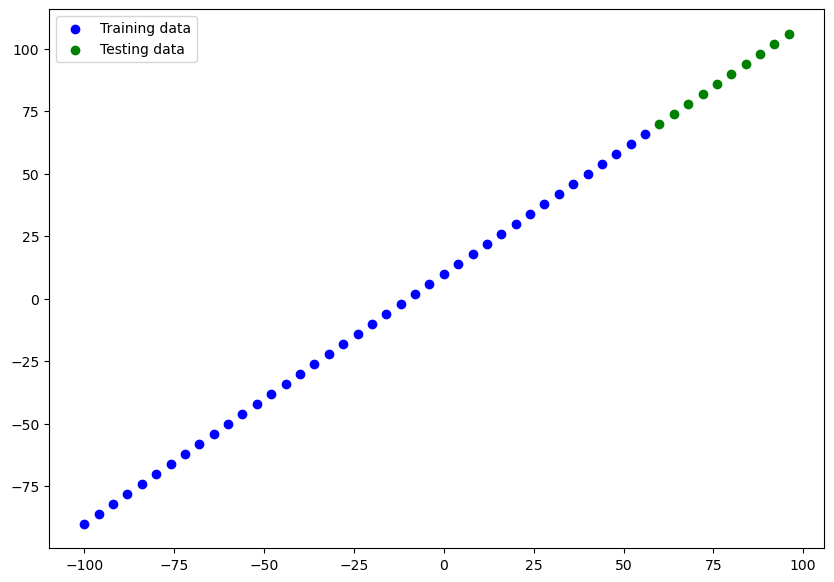

In [20]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

### Visualizing the model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss =tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [22]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [36]:
# Create a model that build automatically by specifying the input shape

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 33.9400 - mae: 33.9400
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 30.5302 - mae: 30.5302
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 26.9595 - mae: 26.9595
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 23.5949 - mae: 23.5949
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 20.4200 - mae: 20.4200
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 17.9247 - mae: 17.9247
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 15.7230 - mae: 15.7230
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 13.8005 - mae: 13.8005
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4502 - mae: 12.4502
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8153 - mae: 11.8153
Epoch 11/100
2/2 [==============================]

2/2 [==============================] - 0s 8ms/step - loss: 8.1763 - mae: 8.1763
Epoch 89/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5441 - mae: 7.5441
Epoch 90/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5361 - mae: 7.5361
Epoch 91/100
2/2 [==============================] - 0s 10ms/step - loss: 7.5633 - mae: 7.5633
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5879 - mae: 7.5879
Epoch 93/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5882 - mae: 7.5882
Epoch 94/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5289 - mae: 7.5289
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 7.7071 - mae: 7.7071
Epoch 96/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5680 - mae: 7.5680
Epoch 97/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6714 - mae: 7.6714
Epoch 98/100
2/2 [==============================] - 0s 8ms/step - loss: 7.534

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [40]:
# Make prediction
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 171ms/step


In [41]:
y_preds

array([[54.07727 ],
       [57.672455],
       [61.26764 ],
       [64.86282 ],
       [68.45801 ],
       [72.05319 ],
       [75.64838 ],
       [79.24356 ],
       [82.838745],
       [86.43393 ]], dtype=float32)

In [42]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

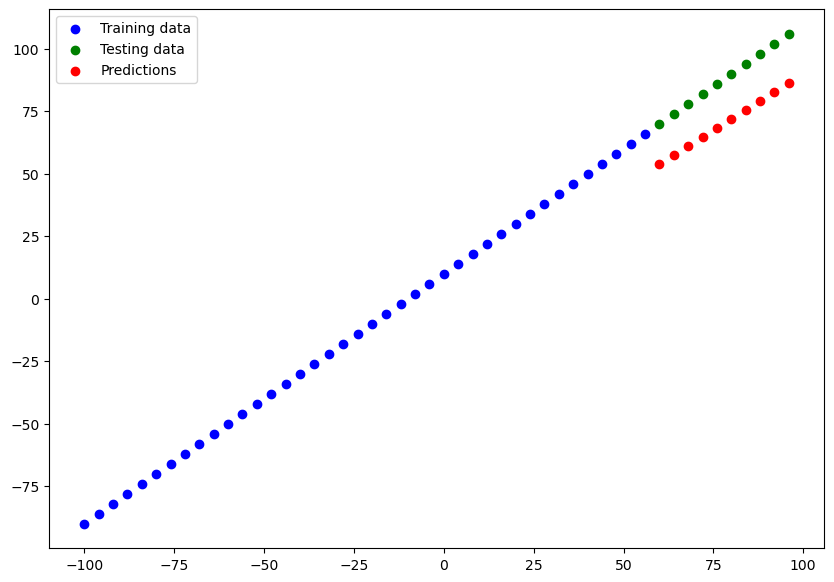

In [43]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [44]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 494ms/step - loss: 17.7444 - mae: 17.7444


[17.744400024414062, 17.744400024414062]

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.92273  , 30.327545 , 26.73236  , 23.137177 , 19.541992 ,
       16.357447 , 13.810974 , 11.9025755, 10.632251 , 10.       ],
      dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [46]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [48]:
y_preds

array([[54.07727 ],
       [57.672455],
       [61.26764 ],
       [64.86282 ],
       [68.45801 ],
       [72.05319 ],
       [75.64838 ],
       [79.24356 ],
       [82.838745],
       [86.43393 ]], dtype=float32)

In [49]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [50]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([54.07727 , 57.672455, 61.26764 , 64.86282 , 68.45801 , 72.05319 ,
       75.64838 , 79.24356 , 82.838745, 86.43393 ], dtype=float32)>

In [52]:
# Check the tensor shapes
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [55]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae.numpy()

17.7444

In [56]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse.numpy()

316.21573

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [58]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

### Running experiments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build** `model_1`

In [59]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 78.4253 - mae: 78.4253
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 43.0603 - mae: 43.0603
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 10.6586 - mae: 10.6586
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 9.6068 - mae: 9.6068
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.5179 - mae: 10.5179
Epoch 6/100
2/2 [==============================] - 0s 71ms/step - loss: 9.7419 - mae: 9.7419
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 8.8339 - mae: 8.8339
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 9.0879 - mae: 9.0879
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 19.3694 - mae: 19.3694
Epoch 10/100
2/2 [==============================] - 0s 63ms/step - loss: 10.4739 - mae: 10.4739
Epoch 11/100
2/2 [==============================] - 0s 27

2/2 [==============================] - 0s 13ms/step - loss: 11.4693 - mae: 11.4693
Epoch 88/100
2/2 [==============================] - 0s 15ms/step - loss: 9.9692 - mae: 9.9692
Epoch 89/100
2/2 [==============================] - 0s 10ms/step - loss: 7.2706 - mae: 7.2706
Epoch 90/100
2/2 [==============================] - 0s 15ms/step - loss: 12.7325 - mae: 12.7325
Epoch 91/100
2/2 [==============================] - 0s 13ms/step - loss: 7.3369 - mae: 7.3369
Epoch 92/100
2/2 [==============================] - 0s 15ms/step - loss: 7.7026 - mae: 7.7026
Epoch 93/100
2/2 [==============================] - 0s 14ms/step - loss: 7.1349 - mae: 7.1349
Epoch 94/100
2/2 [==============================] - 0s 9ms/step - loss: 12.5783 - mae: 12.5783
Epoch 95/100
2/2 [==============================] - 0s 15ms/step - loss: 9.9552 - mae: 9.9552
Epoch 96/100
2/2 [==============================] - 0s 15ms/step - loss: 9.1481 - mae: 9.1481
Epoch 97/100
2/2 [==============================] - 0s 9ms/step - lo

1/1 [==============================] - 0s 186ms/step


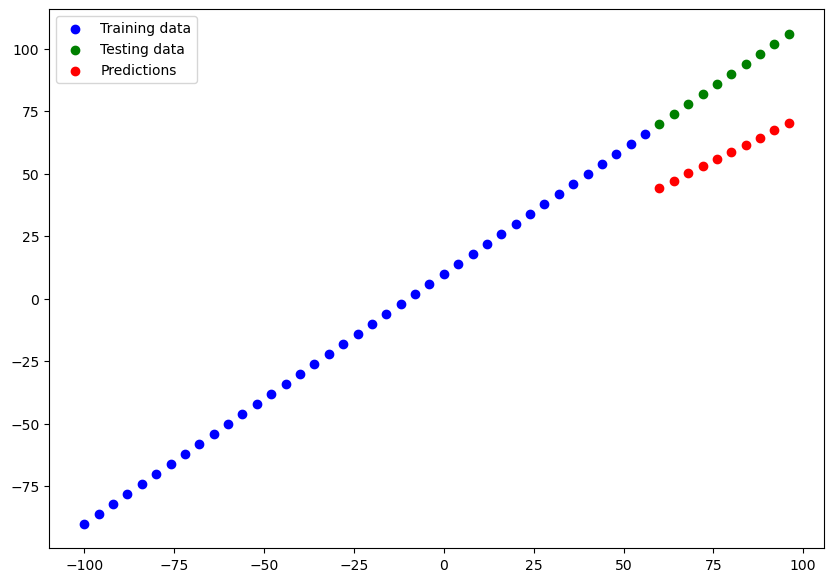

In [60]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [61]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.706985, 953.40515)

**Build** `Model 2`

In [62]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 197ms/step


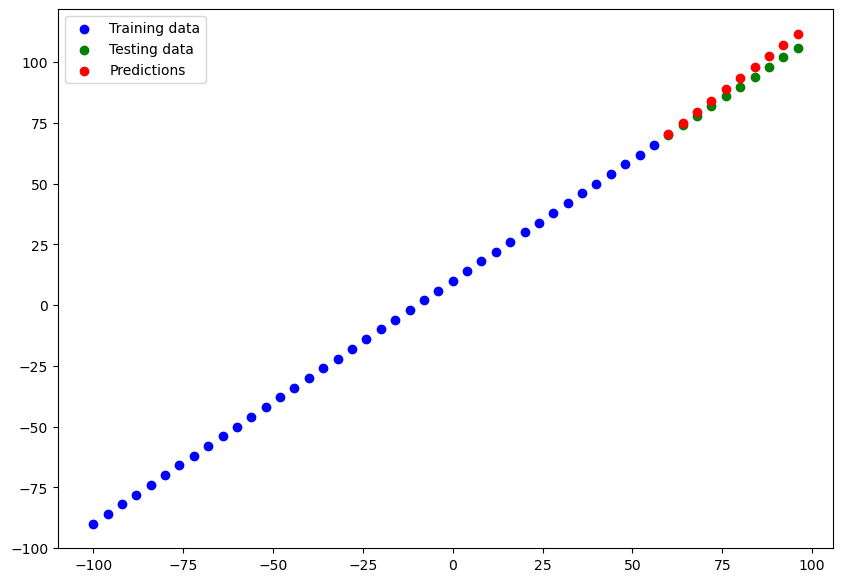

In [63]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [64]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.0869567, 12.323615)

**Build** `Model 3`

In [65]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 166ms/step


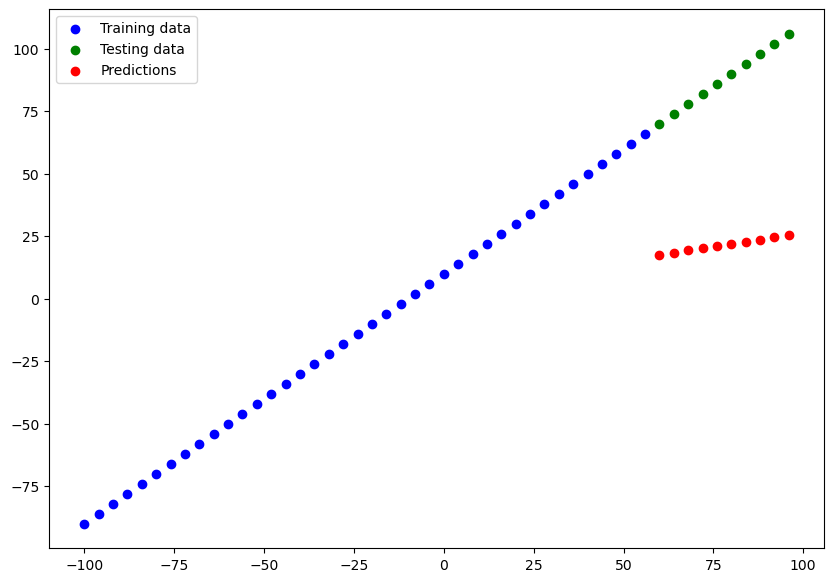

In [66]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [67]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3
     

(66.49955, 4503.3706)

## Comparing results

In [68]:

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [69]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.706985,953.405151
1,model_2,3.086957,12.323615
2,model_3,66.499550,66.499550


### Tracking your experiments

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

### Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [70]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [72]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!dir best_model_SavedModel_format

 Volume in drive C has no label.
 Volume Serial Number is 80C8-EDA2

 Directory of C:\Users\Bolaji\Desktop\Tensorflow Developer Certificate\tensorflow_fundamentals\best_model_SavedModel_format

02/17/2023  09:38 PM    <DIR>          .
02/17/2023  09:38 PM    <DIR>          ..
02/17/2023  09:38 PM    <DIR>          assets
02/17/2023  09:38 PM                55 fingerprint.pb
02/17/2023  09:38 PM             6,306 keras_metadata.pb
02/17/2023  09:38 PM            62,363 saved_model.pb
02/17/2023  09:38 PM    <DIR>          variables
               3 File(s)         68,724 bytes
               4 Dir(s)  25,415,905,280 bytes free


In [73]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [74]:
# Check it out
!dir best_model_HDF5_format.h5

 Volume in drive C has no label.
 Volume Serial Number is 80C8-EDA2

 Directory of C:\Users\Bolaji\Desktop\Tensorflow Developer Certificate\tensorflow_fundamentals

02/17/2023  09:41 PM            21,952 best_model_HDF5_format.h5
               1 File(s)         21,952 bytes
               0 Dir(s)  25,414,225,920 bytes free


### Loading a model
We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [75]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 95ms/step


True

Loading in from the HDF5 is much the same.

In [79]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 225ms/step


True